### Implementation of the efficient algorithm for generating ROC points
- Algorithm 1 in paper by *Fawcett 2006*

In [20]:
# import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [78]:
def ROC_points(in_data):
    '''
    Function to generate ROC points for a bianry classifier on a given sample set with true lables and scores
    Input: a DataFrame with actual class label and scores
    Output:ROC points (tp rate, fp rate)
    '''
    ## sort the input data in descending order
    dat=in_data.sort_values(by=['score'],ascending=False)
    ## compute # of positive labels and negative labels
    P=dat.label[dat.label==1].count()
    N=P=dat.label[dat.label==0].count()
    
    ## initialize tp and fp to 0
    tp=0
    fp=0
    ## initialize previous score to -inf
    f_prev=-np.inf
    
    ## create an empty stack
    result=[]
    
    ## compute ROC points increasing by fp rate
    for i in range(dat.shape[0]):
        if dat.score[i]!=f_prev:
            result.append((fp/N,tp/P))
            f_prev=dat.score[i]
        if dat.label[i]==1:
            tp+=1
        else:
            fp+=1
    result.append((fp/N,tp/P))
    
    return pd.DataFrame(result,columns=['fp','tp'])

In [169]:
# test sample
# Figure 3 in Fawcett 2006
# class label=1: positive, label=0: negative
instance=np.array(range(20))
class_lable=np.array([1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0])
score_=np.array([0.9,0.8,0.7,0.6,0.55,0.54,0.53,0.52,0.51,0.505,0.4,0.39,0.38,0.37,0.36,0.35,0.34,0.33,0.30,0.1])
temp={'ID':instance,'label':class_lable,'score':score_}

# put them together as a matrix
dat_test=pd.DataFrame(data=temp,index=range(len(instance)),columns=['ID','label','score'])


In [170]:
# shuffle the order
ind=np.random.choice(range(len(instance)),size=len(instance),replace=False)
dat_test=dat_test.iloc[ind]

In [172]:
#ind_order=np.argsort()
dat_test.sort_values(by=['score'],ascending=False)

,ID,label,score
0,0,1,0.900
1,1,1,0.800
2,2,0,0.700
3,3,1,0.600
4,4,1,0.550
5,5,1,0.540
6,6,0,0.530
7,7,0,0.520
8,8,1,0.510
9,9,0,0.505


In [176]:
points=ROC_points(dat_test)
points.head()

,fp,tp
0,0.0,0.0
1,0.0,0.1
2,0.0,0.2
3,0.1,0.2
4,0.1,0.3


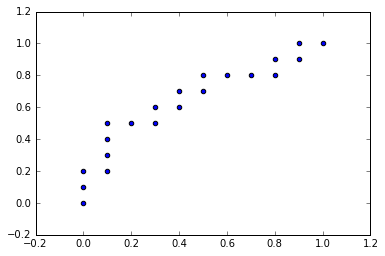

In [177]:
plt.scatter(points.fp,points.tp)